<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Polynomial Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement Polynomial Regression
* Create a model, train it, test it and use the model


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#download_data">Downloading Data</a></li>
        <li><a href="#polynomial_regression">Polynomial regression</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


<h2 id="download_data">Downloading Data</h2>
To download the data, we will use !wget to download it from IBM Object Storage.


In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](https://www.ibm.com/us-en/cloud/object-storage?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01&utm_medium=Exinfluencer&utm_term=10006555)



## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features that we want to use for regression.


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Let's plot Emission values with respect to Engine size:


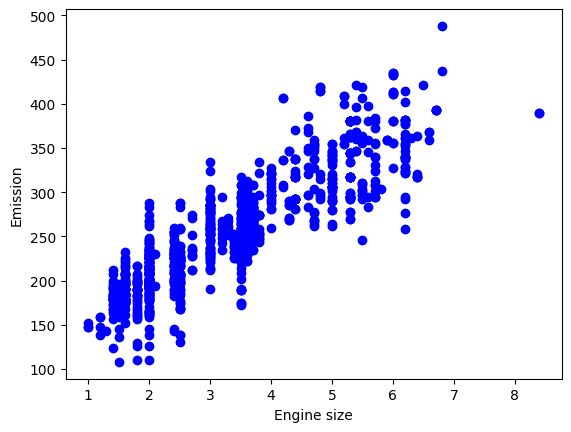

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.


In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [7]:
msk, ~msk

(array([ True,  True, False, ...,  True,  True, False]),
 array([False, False,  True, ..., False, False,  True]))

In [8]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
...,...,...,...,...
1060,3.0,6,11.5,264
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271


In [9]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
8,3.7,6,11.6,267
11,3.5,6,10.4,239
...,...,...,...,...
1043,1.8,4,8.6,198
1055,3.0,6,10.4,281
1058,3.0,6,11.5,264
1061,3.2,6,11.2,258


<h2 id="polynomial_regression">Polynomial regression</h2>


Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$$y = b + \theta_1  x + \theta_2 x^2$$



Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PolynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)

In [18]:
train_x_poly = poly.fit_transform(train_x)

In [19]:
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [20]:
from sklearn.preprocessing import PolynomialFeatures  # Import the PolynomialFeatures class from sklearn.preprocessing module
from sklearn import linear_model  # Import the linear_model module from sklearn

# Extract the 'ENGINESIZE' column from the train dataset and store it in train_x as a NumPy array
# Extract the 'CO2EMISSIONS' column from the train dataset and store it in train_y as a NumPy array
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Extract the 'ENGINESIZE' column from the test dataset and store it in test_x as a NumPy array
# Extract the 'CO2EMISSIONS' column from the test dataset and store it in test_y as a NumPy array
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test['CO2EMISSIONS'])

# Create an instance of the PolynomialFeatures class with degree=2
# This means that the input features will be transformed by adding
# polynomial terms up to the second degree (squared terms)
poly = PolynomialFeatures(degree=2)

# Apply the PolynomialFeatures transformation to the train_x data
# The fit_transform method first fits the transformation to the data and then applies it
# The transformed data, which now includes the original features and their polynomial terms, 
# is stored in train_x_poly
train_x_poly = poly.fit_transform(train_x)

# Print the transformed train_x_poly data
# It will include the original 'ENGINESIZE' feature and its squared term
train_x_poly


array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).   

The equation and the sample example is displayed below.   


$$
\begin{bmatrix}
    v_1\\\\\\
    v_2\\\\\\
    \vdots\\\\\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\\\\\
    [ 1 & v_2 & v_2^2]\\\\\\
    \vdots & \vdots & \vdots\\\\\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$$




$$
\begin{bmatrix}
    2.\\\\\\
    2.4\\\\\\
    1.5\\\\\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
    [ 1 & 2. & 4.]\\\\\\
    [ 1 & 2.4 & 5.76]\\\\\\
    [ 1 & 1.5 & 2.25]\\\\\\
    \vdots & \vdots & \vdots\\\\\\
\end{bmatrix}
$$







It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the 2nd degree equation would be turn into:

$$y = b + \theta_1  x_1 + \theta_2 x_2$$

Now, we can deal with it as a 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such problems. 



so we can use __LinearRegression()__ function to solve it:


## my understandings
that's correct. The fit_transform method of the PolynomialFeatures class takes the input data and transforms it by adding polynomial terms up to the specified degree, and then returns the transformed data as a new array.

Here's a breakdown of what happens:

poly = PolynomialFeatures(degree=2) creates an instance of the PolynomialFeatures class with degree=2, which means it will add polynomial terms up to the second degree (squared terms).

train_x_poly = poly.fit_transform(train_x) applies the polynomial transformation to the input data train_x.

The fit part of fit_transform computes the necessary parameters or statistics required for the transformation based on the input data train_x. In this case, it doesn't really do anything since the transformation is straightforward.

The transform part applies the actual transformation to the input data train_x. It generates new features by raising the original features to the specified degree (in this case, up to the second degree).

The transformed data, which includes the original features and the newly generated polynomial terms, is stored in train_x_poly.

So, in essence, the fit_transform method takes the input data (train_x) and generates a new array (train_x_poly) that contains the original features and their polynomial terms up to the specified degree (in this case, the squared terms).

This transformed data train_x_poly can then be used to train a regression model, which can capture non-linear relationships between the input features and the target variable by considering the polynomial terms.

## let's take a look at an example of how the PolynomialFeatures transformation works in this case.

Suppose we have the following input data for train_x:
```python
train_x = np.array([[1.0], [2.0], [3.0]])

```

This represents the 'ENGINESIZE' feature for three data points.

When we apply the PolynomialFeatures transformation with degree=2, it will create new features by raising the original feature to the specified degree. In this case, it will add a squared term for each data point.
```python
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)
```


```python
Output:

[[1.0 1.0]
 [2.0 4.0]
 [3.0 9.0]]
 ```



As you can see, the transformed train_x_poly now has two columns:

The first column is the original 'ENGINESIZE' feature.
The second column is the squared term of the 'ENGINESIZE' feature.
So, for the first data point with 'ENGINESIZE' = 1.0, the transformed features are [1.0, 1.0] (original feature and its square). For the second data point with 'ENGINESIZE' = 2.0, the transformed features are [2.0, 4.0] (original feature and its square). And for the third data point with 'ENGINESIZE' = 3.0, the transformed features are [3.0, 9.0] (original feature and its square).

By including these polynomial terms, the regression model can capture non-linear relationships between the input features and the target variable ('CO2EMISSIONS'). The model will have coefficients for both the original feature and its squared term, allowing it to fit a quadratic curve to the data if necessary.

In [21]:
# Create a LinearRegression object from the linear_model module in scikit-learn 
# In the code clf = linear_model.LinearRegression(), clf stands for "classifier".
# It is a common convention in scikit-learn (and in machine learning in general)
# to use the abbreviation clf to represent a classifier or a model object.
# Although the code is using a linear regression model, which is a regression 
# algorithm and not a classification algorithm, the convention of using clf is still followed.


clf = linear_model.LinearRegression()

# Fit the linear regression model to the training data
# train_x_poly is the training data (features) after polynomial transformation
# train_y is the target variable (labels) for the training data
train_y_ = clf.fit(train_x_poly, train_y)

# Print the coefficients (weights) of the linear regression model
print('Coefficients: ', clf.coef_)

# Print the intercept (bias) of the linear regression model
print('Intercept: ', clf.intercept_)


Coefficients:  [[ 0.         47.33085596 -0.98001609]]
Intercept:  [111.16173096]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit curvy line. 
Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:


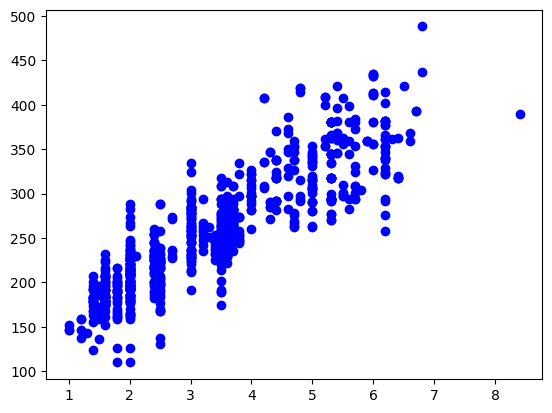

In [19]:
# Create a scatter plot of the training data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

# Create an array of values for the x-axis (Engine size)
XX = np.arange(0.0, 10.0, 0.1)


### Using Series (1D array) for plotting with dot notation is simpler and preferred.

Use Case: This is the preferred method for plotting because it's straightforward 
and aligns with the expected input format for most plotting functions. 
It directly accesses the column data as a 1D array, making it simpler and more intuitive for plotting.
``` Python
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
```
### Using DataFrame (2D array) with double brackets is less common and not necessary for plotting.

Use Case: This method is typically not necessary for simple plotting and can be less efficient. 
It's more commonly used when you need to ensure you are working with DataFrames, 
perhaps for consistency in method chaining or for certain operations that specifically require DataFrames.
``` Python
plt.scatter(train[['ENGINESIZE']], train[['CO2EMISSIONS']], color='blue')
```

In [20]:
XX

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [21]:
# Calculate the predicted values of CO2EMISSIONS (y-axis) 
# using the trained linear regression model
# This includes the intercept, linear term (x), and quadratic term (x^2)
# REMEMBER THIS :
# Coefficients:  [[ 0.         51.61487967 -1.69975914]] ****************************************************
# Intercept:  [106.51011431] ********************************************************************************
# SO THE LovING intercept_[0] AND clf.coef_[0][1]*XX ETC.... COMES FROM THE THINGS WE'VE GOT ****************

# AND.... THIS IS  the 2nd degree polynomial LET'S PUT IT ALL TOGATHER
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)

In [22]:
yy

array([107.38744804, 112.42140296, 117.4262536 , 122.40199994,
       127.348642  , 132.26617977, 137.15461325, 142.01394245,
       146.84416735, 151.64528796, 156.41730429, 161.16021633,
       165.87402408, 170.55872754, 175.21432671, 179.84082159,
       184.43821219, 189.00649849, 193.54568051, 198.05575824,
       202.53673168, 206.98860083, 211.4113657 , 215.80502627,
       220.16958256, 224.50503455, 228.81138226, 233.08862568,
       237.33676481, 241.55579966, 245.74573021, 249.90655647,
       254.03827845, 258.14089614, 262.21440954, 266.25881865,
       270.27412347, 274.26032401, 278.21742025, 282.14541221,
       286.04429988, 289.91408326, 293.75476235, 297.56633715,
       301.34880766, 305.10217389, 308.82643582, 312.52159347,
       316.18764683, 319.8245959 , 323.43244068, 327.01118118,
       330.56081738, 334.0813493 , 337.57277692, 341.03510026,
       344.46831931, 347.87243408, 351.24744455, 354.59335073,
       357.91015263, 361.19785024, 364.45644355, 367.68

Text(0, 0.5, 'Emission')

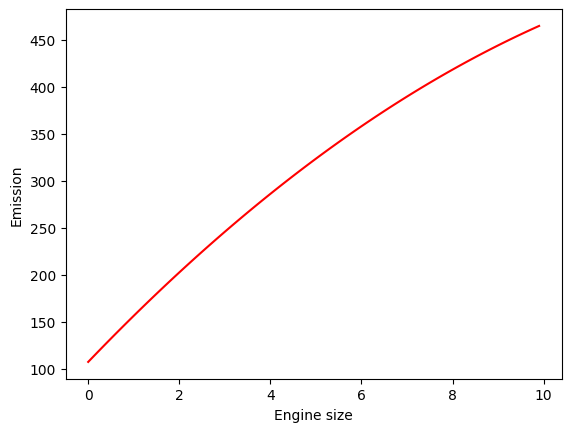

In [25]:

# Plot the regression line using the calculated values
plt.plot(XX, yy, '-r')

# Add labels to the x-axis and y-axis
plt.xlabel("Engine size")
plt.ylabel("Emission")

# plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue') 
# creates a scatter plot of the training data, where the x-axis represents
# the ENGINESIZE feature, and the y-axis represents the CO2EMISSIONS target
# variable. The color='blue' argument sets the color of the scatter points to blue.

# XX = np.arange(0.0, 10.0, 0.1) creates a NumPy array XX containing values ranging
# from 0.0 to 9.9 (inclusive) with a step size of 0.1. This array will be used
# to plot the regression line.

# yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
# calculates the predicted values of the target variable (CO2EMISSIONS) using 
# the trained linear regression model (clf) and the values in XX. The equation used
# is: y = intercept + coefficient1 * x + coefficient2 * x^2. Here, clf.intercept_[0]
# is the intercept (bias) of the linear regression model, clf.coef_[0][1] is the
# coefficient (weight) for the linear term (x), and clf.coef_[0][2] is the
# coefficient for the quadratic term (x^2). The np.power(XX, 2) calculates the 
# squared values of XX.

# plt.plot(XX, yy, '-r') plots the regression line on the same plot as the 
# scatter points. The XX array is used for the x-axis values, and the yy array
# (calculated in the previous step) is used for the y-axis values. The -r argument
# specifies that the line should be a solid red line.

# plt.xlabel("Engine size") adds a label to the x-axis ("Engine size").

# plt.ylabel("Emission") adds a label to the y-axis ("Emission").


Text(0, 0.5, 'Emission')

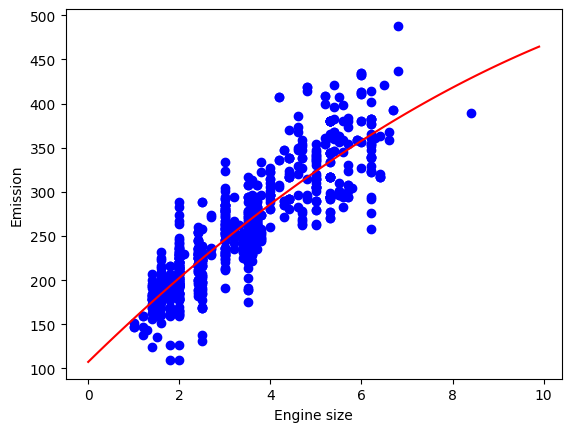

In [26]:
# Create a scatter plot of the training data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

# Create an array of values for the x-axis (Engine size)
XX = np.arange(0.0, 10.0, 0.1)

# AND.... THIS IS  the 2nd degree polynomial LET'S PUT IT ALL TOGATHER
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)

# Plot the regression line using the calculated values
plt.plot(XX, yy, '-r')

# Add labels to the x-axis and y-axis
plt.xlabel("Engine size")
plt.ylabel("Emission")


This line calculates the predicted CO2 emissions using the quadratic regression model. The equation used is 
$ 𝑦 = intercept + coef₁ × 𝑥 + coef₂ × 𝑥² $ , where:

- `clf.intercept_[0]` is the intercept (bias) of the linear regression model.
- `clf.coef_[0][1]` is the coefficient for the linear term 𝑥.
- `clf.coef_[0][2]` is the coefficient for the quadratic term 𝑥².
- `np.power(XX, 2)` computes the squared values of XX.


### Better and simpler way of plotting

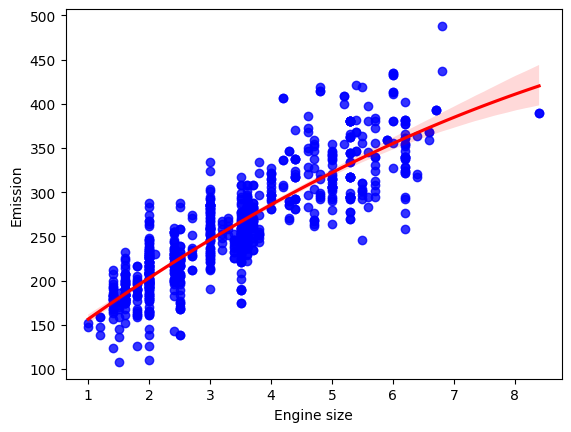

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a polynomial regression line
sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', data=train, order=2, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add labels to the x-axis and y-axis
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Show the plot
plt.show()


<h2 id="evaluation">Evaluation</h2>


In [22]:
from sklearn.metrics import r2_score  # Importing the r2_score function from sklearn.metrics

# Transforming the test features (test_x) using the polynomial transformation (poly), because the model is trained transfomed



test_x_poly = poly.transform(test_x)

# Transforming test features (test_x) to match the polynomial format used in training.
# During model training, `poly.fit_transform(train_x)` transformed training features
# into polynomial form. To ensure model consistency, apply `poly.transform(test_x)`
# before making predictions (`clf.predict(test_x_poly)`).


# Predicting the target variable (test_y_) using the trained polynomial regression model (clf)
test_y_pred = clf.predict(test_x_poly)

# Calculating and printing the Mean Absolute Error (MAE) between predicted (test_y_) and actual (test_y) values
# MAE measures the average magnitude of the errors in a set of predictions, without considering their direction
print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_pred - test_y)))

# Calculating and printing the Residual Sum of Squares (MSE) between predicted (test_y_) and actual (test_y) values
# MSE measures the average of the squares of the errors—that is, the average squared difference between predicted and actual values
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))

# Calculating and printing the R-squared score (R2-score) between actual (test_y) and predicted (test_y_) values
# R2-score measures the proportion of the variance in the dependent variable that is predictable from the independent variables
print("R2-score: %.2f" % r2_score(y_true= test_y, y_pred= test_y_pred))


Mean absolute error (MAE): 69.62
Residual sum of squares (MSE): 7614.34
R2-score: 0.77


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Importing required metrics functions

# Transforming test features (test_x) to match the polynomial format used in training.
# During model training, `poly.fit_transform(train_x)` transformed training features
# into polynomial form. To ensure model consistency, apply `poly.transform(test_x)`
# before making predictions (`clf.predict(test_x_poly)`).
test_x_poly = poly.transform(test_x)

# Predicting the target variable (test_y_) using the trained polynomial regression model (clf)
test_y_pred = clf.predict(test_x_poly)

# Calculating and printing the Mean Absolute Error (MAE) between predicted (test_y_) and actual (test_y) values
# MAE measures the average magnitude of the errors in a set of predictions, without considering their direction
mae = mean_absolute_error(test_y, test_y_pred)
print(f"Mean absolute error (MAE): {mae:.2f}")

# Calculating and printing the Mean Squared Error (MSE) between predicted (test_y_) and actual (test_y) values
# MSE measures the average of the squares of the errors—that is, the average squared difference between predicted and actual values
mse = mean_squared_error(test_y, test_y_pred)
print(f"Mean squared error (MSE): {mse:.2f}")

# Calculating and printing the R-squared score (R2-score) between actual (test_y) and predicted (test_y_) values
# R2-score measures the proportion of the variance in the dependent variable that is predictable from the independent variables
r2 = r2_score(test_y, test_y_pred)
print(f"R2-score: {r2:.2f}")


Mean absolute error (MAE): 22.79
Mean squared error (MSE): 890.29
R2-score: 0.77


<h2 id="practice">Practice</h2>
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?


In [29]:
# write your code here
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly_3 = PolynomialFeatures(degree= 3)
train_x_poly_3 = poly_3.fit_transform(train_x)
train_x_poly_3

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

<details><summary>Click here for the solution</summary>

```python    
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )

```

</details>


In [30]:
clf_3 = linear_model.LinearRegression()
train_y_3 = clf_3.fit(train_x_poly_3, train_y)

print('Coeff:', clf_3.coef_)
print('Intercept: ',clf_3.intercept_)


Coeff: [[ 0.         29.99022616  4.30386204 -0.48813155]]
Intercept:  [128.80095814]


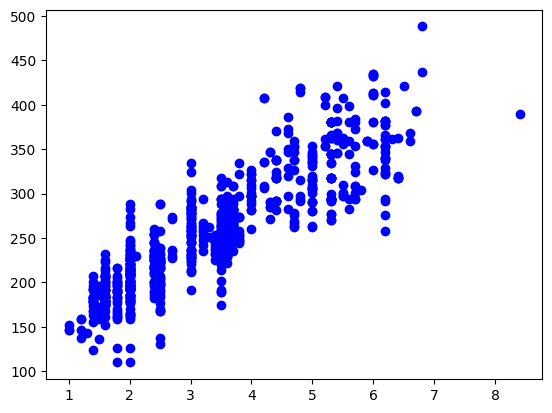

In [35]:
plt.scatter(train[['ENGINESIZE']], train[['CO2EMISSIONS']], color= 'blue')

In [36]:
XX = np.arange(0.0, 10.0, 0.1)
XX

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [37]:
yy = clf_3.intercept_[0]+ clf_3.coef_[0,1]+clf_3.coef_[0,2]*np.power(XX, 2)
yy

array([158.7911843 , 158.83422292, 158.96333878, 159.17853188,
       159.47980223, 159.86714981, 160.34057463, 160.9000767 ,
       161.545656  , 162.27731255, 163.09504634, 163.99885737,
       164.98874563, 166.06471114, 167.22675389, 168.47487389,
       169.80907112, 171.22934559, 172.7356973 , 174.32812626,
       176.00663245, 177.77121589, 179.62187656, 181.55861448,
       183.58142964, 185.69032204, 187.88529168, 190.16633856,
       192.53346268, 194.98666404, 197.52594264, 200.15129849,
       202.86273157, 205.6602419 , 208.54382946, 211.51349427,
       214.56923631, 217.7110556 , 220.93895213, 224.2529259 ,
       227.65297691, 231.13910516, 234.71131065, 238.36959339,
       242.11395336, 245.94439057, 249.86090503, 253.86349672,
       257.95216566, 262.12691184, 266.38773525, 270.73463591,
       275.16761381, 279.68666895, 284.29180133, 288.98301095,
       293.76029782, 298.62366192, 303.57310326, 308.60862185,
       313.73021767, 318.93789074, 324.23164105, 329.61

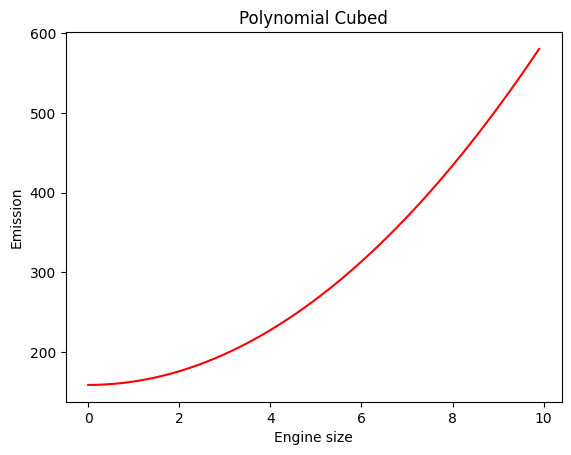

In [39]:
plt.plot(XX,yy, '-r')
plt.title("Polynomial Cubed")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

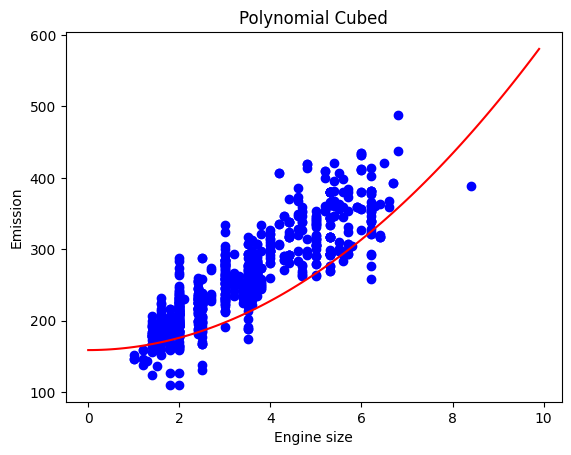

In [40]:
plt.scatter(train[['ENGINESIZE']], train[['CO2EMISSIONS']], color= 'blue')
XX = np.arange(0.0, 10.0, 0.1)

yy = clf_3.intercept_[0]+ clf_3.coef_[0,1]+clf_3.coef_[0,2]*np.power(XX, 2)

plt.plot(XX,yy, '-r')
plt.title("Polynomial Cubed")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Evaluation Metrics

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


test_x_poly_3 = poly_3.transform(test_x)
test_y_pred = clf_3.predict(test_x_poly_3)

In [25]:
mae = mean_absolute_error(y_true= test_y , y_pred= test_y_pred)

mse = mean_squared_error(y_true= test_y , y_pred= test_y_pred)

r2s= r2_score(y_true=test_y , y_pred=test_y_pred)


print("Polynomial degree =3")

print("mean_absolute_error", mae)
print("mean_squared_error", mse)
print("r2_score", r2s)

Polynomial degree =3
mean_absolute_error 22.794756669096515
mean_squared_error 890.2892867897879
r2_score 0.7729642888324473


In [26]:
print("Polynomial degree =2")
print(f"Mean absolute error (MAE): {mae:.2f}")

print(f"Mean squared error (MSE): {mse:.2f}")

print(f"R2-score: {r2:.2f}")


Polynomial degree =2
Mean absolute error (MAE): 22.79
Mean squared error (MSE): 890.29
R2-score: 0.77


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01&utm_medium=Exinfluencer&utm_term=10006555">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01&utm_medium=Exinfluencer&utm_term=10006555">Watson Studio</a>



### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Joseph Santarcangelo</a>




## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2021-01-11  | 2.3  | Lakshmi  |  Changed R2-score calculation in polynomial regression |
| 2020-11-04  | 2.2  | Lakshmi  |  Made changes in markdown of equations |
| 2020-11-03  | 2.1  | Lakshmi  |  Made changes in URL |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
